## Imports

In [44]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Packages Imported!")

Packages Imported!


## Settings

In [2]:
MANIFEST_PATH = "E:/datasets/allen_vc/manifest_files/manifest.json"
# MANIFEST_PATH = "D:/datasets/allen_vc/manifest.json"
PROJECT_PATH = "G:/Shared drives/visual_encoding"
REPO_PATH = 'C:/Users/User/visual_encoding'
# REPO_PATH = 'C:/Users/micha/projects/visual_encoding'
DATA_PATH = "G:/Shared drives/visual_encoding/data/optotagging_data/concat"

## Functions

In [3]:
def plot_clustering_results(X, gm, idx_plt=[0,1]):
    feats = X.columns.to_list()
    preds = gm.predict(X) 
    _, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X[feats[idx_plt[0]]], X[feats[idx_plt[1]]], c=preds, s=10, cmap='viridis')
    for ii in range(gm.n_components):
        plt.scatter(gm.means_[ii, idx_plt[0]], gm.means_[ii, idx_plt[1]], color='r', s=100)
    ax.set(xlabel=feats[idx_plt[0]].replace('_',' '), ylabel=feats[idx_plt[1]].replace('_',' '))
    plt.show()


## Load Data

In [4]:
# load optotagging response data

# load waveform data

# concatenate and train model!

In [5]:
# # Create Allensdk cache object
# cache = EcephysProjectCache.from_warehouse(manifest=MANIFEST_PATH)

# # Isolate functional connectivity sections
# sessions = cache.get_session_table()
# functional_connectivity_sessions = sessions[sessions['session_type'] == 'functional_connectivity']

In [7]:
# load optotagging response data
opto_df = pd.read_csv(f'{DATA_PATH}/all_stimuli_rr.csv')
print(opto_df['opto_stimulus'].unique())
opto_df.head()

['fast_pulses_1.0s_1' 'fast_pulses_1.0s_2' 'fast_pulses_1.0s_3'
 'pulse_0.0049999999991996455s_1' 'pulse_0.0049999999991996455s_2'
 'pulse_0.0049999999991996455s_3' 'pulse_0.01000000000021828s_1'
 'pulse_0.01000000000021828s_2' 'pulse_0.01000000000021828s_3'
 'raised_cosine_1.0s_1' 'raised_cosine_1.0s_2' 'raised_cosine_1.0s_3']


,unit_id,ecephys_structure_acronym,genotype,opto_stimulus,response_reliability,stim_level,stim_name
0,950922446,VISp,wt/wt,fast_pulses_1.0s_1,0.533333,1,fast_pulses_1.0s
1,950922495,VISp,wt/wt,fast_pulses_1.0s_1,0.133333,1,fast_pulses_1.0s
2,950922511,VISp,wt/wt,fast_pulses_1.0s_1,0.200000,1,fast_pulses_1.0s
3,950922546,VISp,wt/wt,fast_pulses_1.0s_1,0.133333,1,fast_pulses_1.0s
4,950922579,VISp,wt/wt,fast_pulses_1.0s_1,0.200000,1,fast_pulses_1.0s


In [8]:
# load spike waveform data
all_unit_waveforms_df = pd.read_pickle('D:/visual_encoding/data/waveforms/all_units.pkl')
all_unit_waveforms_df

,unit_id,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id
0,950911624,0.666637,0.412060,0.247236,0.000000,0.137353,60.0,-0.115895,156.949650,0.112076,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -1.1590800000000006, -1.6512600000000006...",766640955
1,950911641,0.494906,-0.343384,0.219765,0.068677,0.109883,60.0,-0.085105,144.387750,0.104910,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.8845199999999993, -1.2725699999999995...",766640955
2,950911686,0.554810,0.686767,0.247236,0.000000,0.109883,30.0,-0.080528,132.559830,0.052577,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.6778199999999998, -1.0471500000000007...",766640955
3,950911657,0.454659,0.343384,0.412060,0.068677,0.137353,70.0,-0.060789,108.663750,0.137380,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.4032600000000013, -1.12515, -1.692990...",766640955
4,950911696,0.779000,0.000000,0.178559,-0.608279,0.123618,100.0,-0.220320,186.913740,0.122068,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.9044099999999942, -1.4465100000000035...",766640955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,951190560,0.488657,0.000000,0.206030,0.147164,0.137353,100.0,-0.107414,112.009560,0.064330,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, 0.20592000000000255, 0.4095, 0.070200000...",847657808
870,951190571,0.225447,0.824121,0.782915,-0.304140,0.219765,100.0,-0.029030,109.269615,3.794459,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.1405950000000029, -0.1969500000000018...",847657808
871,951190848,0.378583,0.892797,0.673032,-0.206030,0.206030,80.0,-0.052196,124.145190,1.061227,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.21995999999999505, -0.271439999999997...",847657808
872,951190594,0.343781,1.030151,0.700503,-0.137353,0.219765,80.0,-0.061936,140.108085,0.748724,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.3860999999999981, -0.1263600000000018...",847657808


In [9]:
# merge 10ms pulse rr
stim = 'pulse_0.01000000000021828s'
waveform_features = ['waveform_repolarization_slope',
       'waveform_velocity_above', 'waveform_duration',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'waveform_recovery_slope', 'waveform_amplitude']
stim_df = opto_df[opto_df['stim_name'] == stim].copy()
stim_df = stim_df.groupby('unit_id')['response_reliability', 'genotype'].max().reset_index()
stim_df['opto_pulse_rr_10'] = stim_df['response_reliability']
wv_df = all_unit_waveforms_df.copy()

# join dfs on units
rwv_df = stim_df[['unit_id', 'genotype', 'opto_pulse_rr_10']].merge(wv_df, how='inner', on='unit_id')

print(f"Shape\t{rwv_df.shape}")
rwv_df

Shape	(1679, 15)


C:\Users\User\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,unit_id,genotype,opto_pulse_rr_10,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id
0,950922446,wt/wt,0.133333,0.196397,1.648241,0.837856,0.000000,0.233501,70.0,-0.017755,82.695990,0.162727,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.6830849999999998, 0.4758000000000001, ...",771160300
1,950922495,wt/wt,0.000000,0.189410,0.206030,0.865327,-0.343384,0.247236,60.0,-0.015247,75.754965,1.453777,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.639404999999998, -0.01053000000000015...",771160300
2,950922511,wt/wt,0.000000,0.196521,0.892797,0.975209,-1.030151,0.219765,60.0,-0.005732,101.102820,0.677403,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.4352400000000006, 0.5539949999999999, ...",771160300
3,950922546,wt/wt,0.000000,0.337895,0.343384,0.782915,0.274707,0.192295,60.0,-0.020037,123.288945,0.559018,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.013650000000000051, -0.38648999999999...",771160300
4,950922579,wt/wt,0.000000,0.335487,2.541039,0.618090,0.343384,0.219765,60.0,-0.069469,126.942465,0.348328,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.1755000000000011, -0.0746850000000014...",771160300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,951187345,wt/wt,0.200000,0.224074,0.000000,0.192295,-0.343384,0.068677,50.0,-0.068635,66.686880,0.067362,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.11017500000000213, 0.1519049999999978...",847657808
1675,951187357,wt/wt,0.000000,0.240237,0.686767,0.755444,-0.824121,0.260972,80.0,-0.050865,129.761775,2.913732,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.24082500000000007, 0.0257400000000005...",847657808
1676,951187369,wt/wt,0.160000,0.276874,0.824121,0.233501,0.000000,0.123618,70.0,-0.061505,62.602020,0.183801,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, 0.19890000000000452, 0.2995200000000082,...",847657808
1677,951187421,wt/wt,0.000000,0.302307,1.304858,0.590620,-0.068677,0.219765,80.0,-0.056123,114.561720,0.515177,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.18271500000000174, -0.175695000000000...",847657808


In [10]:
# merge 5ms pulse rr
stim = 'pulse_0.0049999999991996455s'
waveform_features = ['waveform_repolarization_slope',
       'waveform_velocity_above', 'waveform_duration',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'waveform_recovery_slope', 'waveform_amplitude']
stim_df = opto_df[opto_df['stim_name'] == stim].copy()
stim_df = stim_df.groupby('unit_id')['response_reliability', 'genotype'].max().reset_index()
stim_df['opto_pulse_rr_5'] = stim_df['response_reliability']

# join dfs on units
rwv_df = rwv_df.merge(stim_df[['unit_id', 'opto_pulse_rr_5']], how='inner', on='unit_id')

print(f"Shape\t{rwv_df.shape}")
rwv_df

Shape	(1679, 16)


C:\Users\User\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,unit_id,genotype,opto_pulse_rr_10,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id,opto_pulse_rr_5
0,950922446,wt/wt,0.133333,0.196397,1.648241,0.837856,0.000000,0.233501,70.0,-0.017755,82.695990,0.162727,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.6830849999999998, 0.4758000000000001, ...",771160300,0.066667
1,950922495,wt/wt,0.000000,0.189410,0.206030,0.865327,-0.343384,0.247236,60.0,-0.015247,75.754965,1.453777,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.639404999999998, -0.01053000000000015...",771160300,0.000000
2,950922511,wt/wt,0.000000,0.196521,0.892797,0.975209,-1.030151,0.219765,60.0,-0.005732,101.102820,0.677403,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.4352400000000006, 0.5539949999999999, ...",771160300,0.000000
3,950922546,wt/wt,0.000000,0.337895,0.343384,0.782915,0.274707,0.192295,60.0,-0.020037,123.288945,0.559018,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.013650000000000051, -0.38648999999999...",771160300,0.000000
4,950922579,wt/wt,0.000000,0.335487,2.541039,0.618090,0.343384,0.219765,60.0,-0.069469,126.942465,0.348328,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.1755000000000011, -0.0746850000000014...",771160300,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,951187345,wt/wt,0.200000,0.224074,0.000000,0.192295,-0.343384,0.068677,50.0,-0.068635,66.686880,0.067362,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.11017500000000213, 0.1519049999999978...",847657808,0.080000
1675,951187357,wt/wt,0.000000,0.240237,0.686767,0.755444,-0.824121,0.260972,80.0,-0.050865,129.761775,2.913732,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.24082500000000007, 0.0257400000000005...",847657808,0.000000
1676,951187369,wt/wt,0.160000,0.276874,0.824121,0.233501,0.000000,0.123618,70.0,-0.061505,62.602020,0.183801,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, 0.19890000000000452, 0.2995200000000082,...",847657808,0.120000
1677,951187421,wt/wt,0.000000,0.302307,1.304858,0.590620,-0.068677,0.219765,80.0,-0.056123,114.561720,0.515177,"[0.0, 3.333299776069197e-05, 6.666599552138394...","[0.0, -0.18271500000000174, -0.175695000000000...",847657808,0.000000


In [11]:
# check for NaN
rwv_df.isna().sum()

unit_id                           0
genotype                          0
opto_pulse_rr_10                  0
waveform_repolarization_slope     0
waveform_velocity_above          26
waveform_duration                 0
waveform_velocity_below          38
waveform_halfwidth               13
waveform_spread                   0
waveform_recovery_slope           8
waveform_amplitude                0
mean_isi                          0
mean_wv_times                     0
mean_wv_values                    0
session_id                        0
opto_pulse_rr_5                   0
dtype: int64

In [12]:
# drop nan
rwv_df.dropna(inplace=True)
print(rwv_df.shape)

(1598, 16)


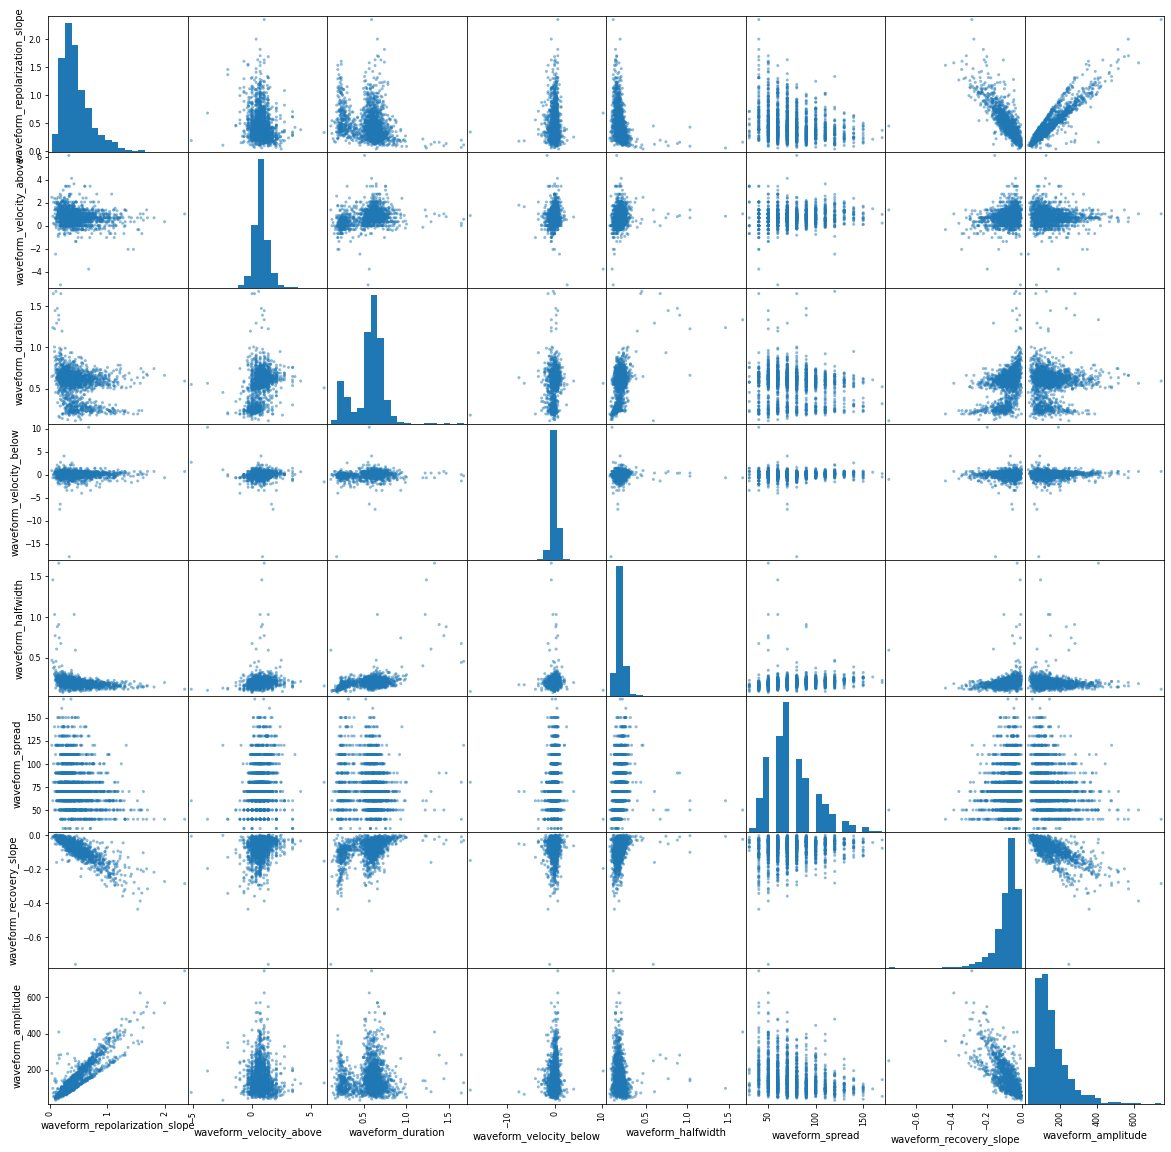

In [13]:
# plot scatter matrix
pd.plotting.scatter_matrix(rwv_df[waveform_features], figsize=(20,20), hist_kwds={'bins':20});

In [14]:
rwv_df.columns

Index(['unit_id', 'genotype', 'opto_pulse_rr_10',
       'waveform_repolarization_slope', 'waveform_velocity_above',
       'waveform_duration', 'waveform_velocity_below', 'waveform_halfwidth',
       'waveform_spread', 'waveform_recovery_slope', 'waveform_amplitude',
       'mean_isi', 'mean_wv_times', 'mean_wv_values', 'session_id',
       'opto_pulse_rr_5'],
      dtype='object')

In [15]:
# add tagged label
# init
thresholds = [0.20, 0.272]
stim_ids = ['pulse_0.0049999999991996455s', 'pulse_0.01000000000021828s']

# apply threshold
rwv_df['tagged'] = np.nan
rwv_df['tagged'] = ((rwv_df['opto_pulse_rr_5'] > thresholds[0]) | (rwv_df['opto_pulse_rr_10'] > thresholds[1]))
rwv_df.head()

,unit_id,genotype,opto_pulse_rr_10,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id,opto_pulse_rr_5,tagged
0,950922446,wt/wt,0.133333,0.196397,1.648241,0.837856,0.000000,0.233501,70.0,-0.017755,82.695990,0.162727,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.6830849999999998, 0.4758000000000001, ...",771160300,0.066667,False
1,950922495,wt/wt,0.000000,0.189410,0.206030,0.865327,-0.343384,0.247236,60.0,-0.015247,75.754965,1.453777,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.639404999999998, -0.01053000000000015...",771160300,0.000000,False
2,950922511,wt/wt,0.000000,0.196521,0.892797,0.975209,-1.030151,0.219765,60.0,-0.005732,101.102820,0.677403,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, 0.4352400000000006, 0.5539949999999999, ...",771160300,0.000000,False
3,950922546,wt/wt,0.000000,0.337895,0.343384,0.782915,0.274707,0.192295,60.0,-0.020037,123.288945,0.559018,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.013650000000000051, -0.38648999999999...",771160300,0.000000,False
4,950922579,wt/wt,0.000000,0.335487,2.541039,0.618090,0.343384,0.219765,60.0,-0.069469,126.942465,0.348328,"[0.0, 3.333334349708743e-05, 6.666668699417486...","[0.0, -0.1755000000000011, -0.0746850000000014...",771160300,0.000000,False


In [16]:
# add duration above (ms)
dur_threshold = 0.38

rwv_df['duration_above'] = rwv_df['waveform_duration'] > dur_threshold

In [17]:
# save to csv
# rwv_df.to_csv(f'G:/Shared drives/visual_encoding/data/optotagging_data/concat/rr_wave_{stim}.csv', index=False)

# Clustering

In [18]:
# settings
clust_set = {'n_components': 2, 'random_state': 0, 'verbose': 1}

In [19]:
# initiailize model
gm = GaussianMixture(**clust_set)

In [20]:
# fit GMM

# pick features
# feats = ['waveform_duration', 'waveform_amplitude']
feats = waveform_features.copy()

# fit model
X = rwv_df[feats] # choose two metrics for visualization
gm.fit(X)
preds = gm.predict(X)

# print results
print(f"\nBaysian Information Criterion: {gm.bic(X)}")
print(f"\nMeans:\n{gm.means_}")
gm

Initialization 0
Initialization converged: True

Baysian Information Criterion: 21144.155561101386

Means:
[[ 3.96186674e-01  8.10993390e-01  5.81577522e-01 -1.14341318e-02
   1.94044290e-01  7.69536126e+01 -6.61981094e-02  1.33254295e+02]
 [ 8.18593408e-01  5.00678298e-01  4.85939921e-01 -3.14316662e-02
   2.03259495e-01  6.60490040e+01 -1.56430016e-01  2.50783658e+02]]


GaussianMixture(n_components=2, random_state=0, verbose=1)

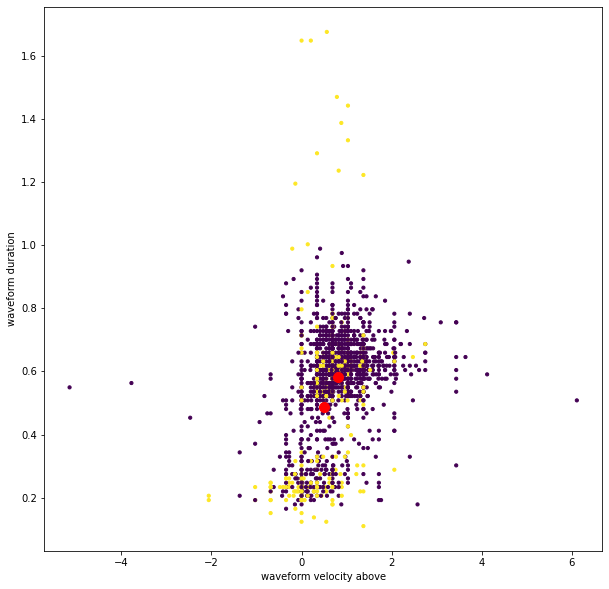

In [21]:
# plot clustering results
plot_clustering_results(X, gm, idx_plt=[1,2])

In [22]:
# fit number of components to all data
max_comp = 15
X = rwv_df[waveform_features]
clust_set['verbose'] = False

bics = []
for i in range(1, max_comp):
    
    clust_set['n_components'] = i
    gm = GaussianMixture(**clust_set)
    gm.fit(X)
    
    bics.append(gm.bic(X))

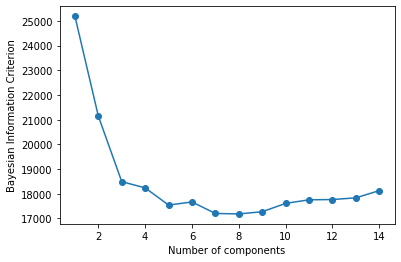

In [23]:
# plot BIC v # components
n_comp = range(1, max_comp)

plt.plot(n_comp, bics)
plt.scatter(n_comp, bics)

plt.xlabel('Number of components')
plt.ylabel('Bayesian Information Criterion');

In [24]:
# find minimum
n_comp = range(1, max_comp)
min_bic = n_comp[np.argmin(bics)]
print(f"Number of components with minimum BIC: {min_bic}")

Number of components with minimum BIC: 8


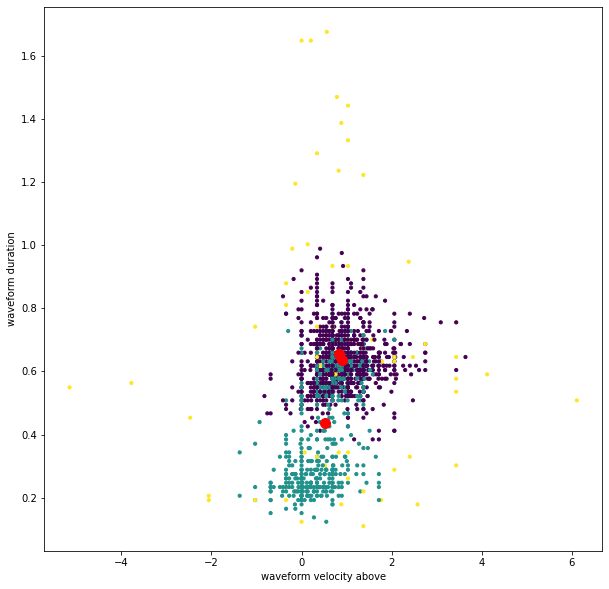

In [25]:
# fit with min_bic components
clust_set['n_components'] = 3 # min_bic
gm = GaussianMixture(**clust_set)
gm.fit(X)
plot_clustering_results(X, gm, idx_plt=[1,2])

In [26]:
# add cluster_num to dataframe
preds = gm.predict(X)
rwv_df['cluster_num'] = preds

In [27]:
# helper funcs

def genetic_resp(df):
    
    for gt in df['genotype'].unique():
        
        gdf = df[df['genotype'] == gt]
        print(f'\t{gdf.tagged.sum()} / {gdf.shape[0]} {gt} units responded')
    
    
def avg_wvf(df, ax=None):
    
    avg_wv = np.stack(df['mean_wv_values']).mean(axis=0) # can easily be changed to plot all waveforms
    t = df['mean_wv_times'].iloc[0]
    
    ax.plot(t * 1000, avg_wv, 'k', alpha=0.3)
             

Cluster 0: 


	7 / 586 wt/wt units responded
	8 / 236 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	3 / 85 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	1 / 69 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded



Cluster 1: 


	19 / 294 wt/wt units responded
	15 / 142 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	15 / 56 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	0 / 58 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded



Cluster 2: 


	0 / 43 wt/wt units responded
	3 / 16 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	1 / 7 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	0 / 6 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded





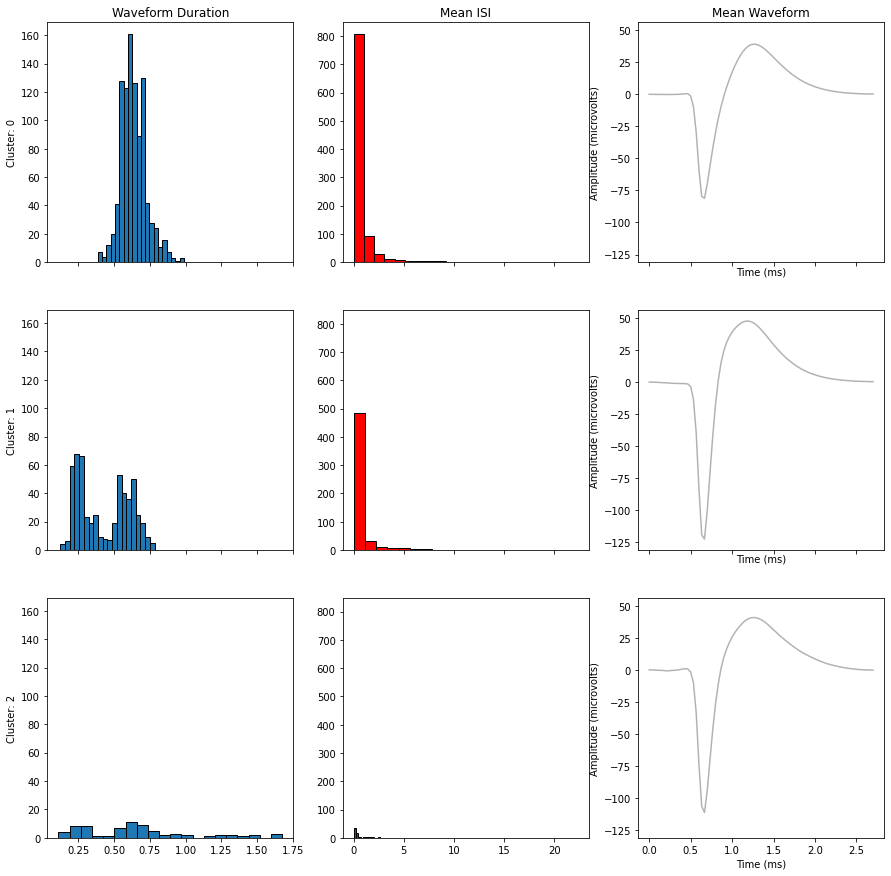

In [28]:
# for each cluster, visualize waveform_duration dist and count responsive units
clusters = rwv_df['cluster_num'].unique()

fig, ax = plt.subplots(3,3, sharex='col', sharey='col', figsize=(15,15))

for i, cluster in enumerate(clusters):
    print(f'Cluster {cluster}: \n\n')
    
    clust_df = rwv_df[rwv_df['cluster_num'] == cluster]
    
    # count number responded for each genotype
    genetic_resp(clust_df)
    
    # plot waveform_duration and mean ISI distribution
    ax[i, 0].hist(clust_df['waveform_duration'], edgecolor='black', bins=20)
    
    ax[i, 1].hist(clust_df['mean_isi'], color= 'red', edgecolor='black', bins=20)
    
    # compute avg waveform across units
    avg_wvf(clust_df, ax[i, 2])
    ax[i, 2].set_xlabel('Time (ms)')
    ax[i, 2].set_ylabel('Amplitude (microvolts)')
    
    ax[i, 0].set_ylabel(f"Cluster: {cluster}")
    
    if i==0:
        ax[i, 0].set_title('Waveform Duration')
        ax[i, 1].set_title('Mean ISI')
        ax[i, 2].set_title('Mean Waveform')
        
    print('\n\n')
    

Based on this particular clustering analysis it appears that cluster 0 may correspond to excitatory units with lower optotagging response rates and longer waveform durations whereas cluster 1 likely corresponds to inhibitory units with higher optotagging response rates and shorter wavefrom durations.

## PCA 

In [38]:
X = rwv_df[waveform_features]
norm = StandardScaler()
X_norm = norm.fit_transform(X)

pca = PCA()
pca.fit(X_norm)

PCA()

In [66]:
pca.explained_variance_ratio_

array([0.37027745, 0.18918563, 0.12884656, 0.12004545, 0.11179057,
       0.05538789, 0.01951032, 0.00495612])

In [65]:
# Get the principal component loading vectors
loading_vectors = pca.components_

# Get the explained variance ratio of the first principal component
explained_variance_ratio = pca.explained_variance_ratio_[0]

# Get the names of the features (columns) in your dataset
feature_names = X.columns

# Calculate the contribution of each variable to the first principal component
contribution_to_first_component = pd.Series(loading_vectors[0], index=feature_names) * explained_variance_ratio

# Sort the contributions in descending order
contribution_to_first_component_sorted = contribution_to_first_component.abs().sort_values(ascending=False)

# Display the contributions
print(contribution_to_first_component_sorted)

waveform_repolarization_slope    0.204194
waveform_recovery_slope          0.193074
waveform_amplitude               0.179579
waveform_duration                0.091997
waveform_halfwidth               0.088249
waveform_spread                  0.073344
waveform_velocity_above          0.064704
waveform_velocity_below          0.008179
dtype: float64


In [40]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
waveform_repolarization_slope,0.551462,0.160684,-0.067268,0.082226,-0.002933,-0.143600,-0.352633,-0.716802
waveform_velocity_above,-0.174744,0.319403,-0.169281,0.617042,-0.591112,0.326241,-0.043463,-0.017725
waveform_duration,-0.248453,0.642528,0.182586,-0.048689,-0.004030,-0.536129,0.417307,-0.167704
waveform_velocity_below,-0.022088,0.255253,-0.600172,-0.676319,-0.289272,0.181091,0.000752,-0.016498
waveform_halfwidth,-0.238331,0.435288,-0.084874,0.080354,0.690733,0.473305,-0.181736,-0.076837
waveform_spread,-0.198078,-0.230471,-0.729229,0.340495,0.253744,-0.441122,0.023156,-0.020618
waveform_recovery_slope,-0.521430,-0.003378,0.168637,-0.146555,-0.147955,-0.280814,-0.759881,-0.003862
waveform_amplitude,0.484986,0.389309,-0.076533,0.094067,0.059115,-0.235064,-0.297711,0.671669


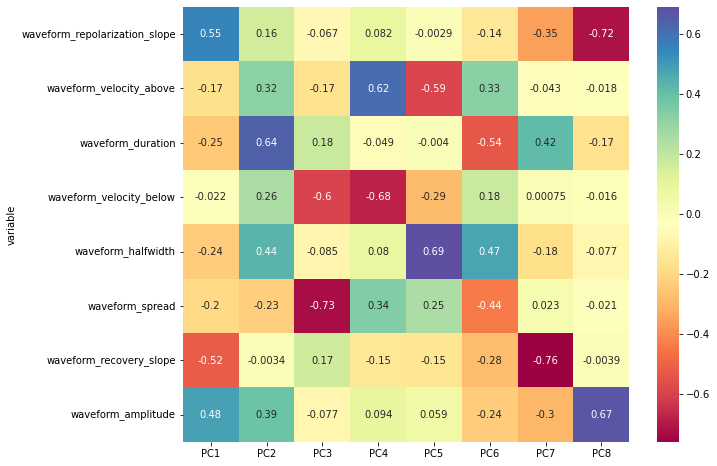

In [48]:
# get correlation matrix plot for loadings
plt.figure(figsize=(10,8))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [59]:
# transform data and apply GaussianMixture
z_vals = pca.transform(X)
pc_label = [f'PC{i + 1}' for i in range(len(waveform_features))]
Z = pd.DataFrame(z_vals, columns=pc_label)

max_comp = 15
bics = []
for i in range(1, max_comp):
    
    clust_set['n_components'] = i
    gm = GaussianMixture(**clust_set)
    gm.fit(Z)
    
    bics.append(gm.bic(Z))

C:\Users\User\.conda\envs\py37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


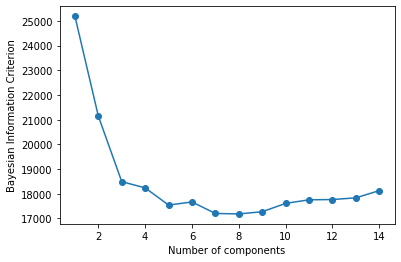

In [60]:
# plot BIC v # components
n_comp = range(1, max_comp)

plt.plot(n_comp, bics)
plt.scatter(n_comp, bics)

plt.xlabel('Number of components')
plt.ylabel('Bayesian Information Criterion');

In [61]:
# find minimum
n_comp = range(1, max_comp)
min_bic = n_comp[np.argmin(bics)]
print(f"Number of components with minimum BIC: {min_bic}")

Number of components with minimum BIC: 8


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

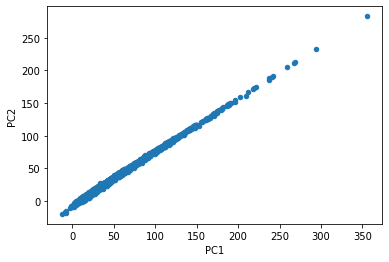

In [71]:
Z.plot(kind="scatter", x="PC1", y="PC2")

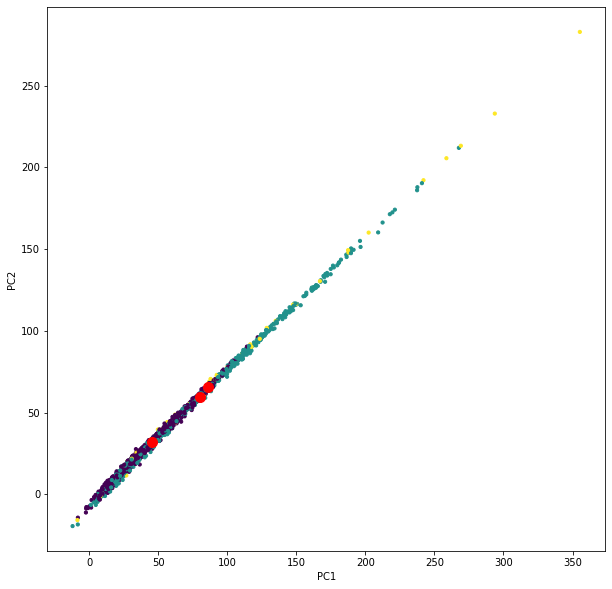

In [63]:
# fit with min_bic components
clust_set['n_components'] = 3 # min_bic
gm = GaussianMixture(**clust_set)
gm.fit(Z)
plot_clustering_results(Z, gm, idx_plt=[0, 1])

In [72]:
# add cluster_num to dataframe
pca_rwv_df = rwv_df.copy()

preds = gm.predict(Z)
pca_rwv_df['cluster_num'] = preds

Cluster 0: 


	7 / 586 wt/wt units responded
	8 / 236 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	3 / 85 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	1 / 69 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded



Cluster 1: 


	19 / 294 wt/wt units responded
	15 / 142 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	15 / 56 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	0 / 58 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded



Cluster 2: 


	0 / 43 wt/wt units responded
	3 / 16 Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	1 / 7 Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded
	0 / 6 Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt units responded





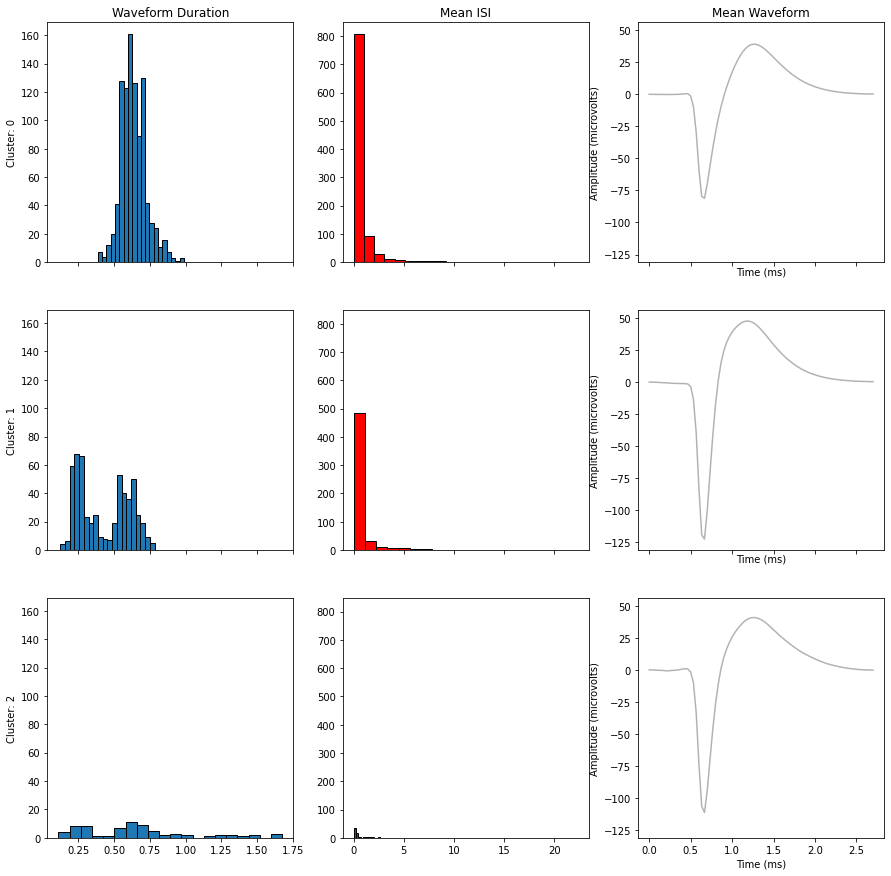

In [73]:
# for each cluster, visualize waveform_duration dist and count responsive units
clusters = pca_rwv_df['cluster_num'].unique()

fig, ax = plt.subplots(3,3, sharex='col', sharey='col', figsize=(15,15))

for i, cluster in enumerate(clusters):
    print(f'Cluster {cluster}: \n\n')
    
    clust_df = pca_rwv_df[pca_rwv_df['cluster_num'] == cluster]
    
    # count number responded for each genotype
    genetic_resp(clust_df)
    
    # plot waveform_duration and mean ISI distribution
    ax[i, 0].hist(clust_df['waveform_duration'], edgecolor='black', bins=20)
    
    ax[i, 1].hist(clust_df['mean_isi'], color= 'red', edgecolor='black', bins=20)
    
    # compute avg waveform across units
    avg_wvf(clust_df, ax[i, 2])
    ax[i, 2].set_xlabel('Time (ms)')
    ax[i, 2].set_ylabel('Amplitude (microvolts)')
    
    ax[i, 0].set_ylabel(f"Cluster: {cluster}")
    
    if i==0:
        ax[i, 0].set_title('Waveform Duration')
        ax[i, 1].set_title('Mean ISI')
        ax[i, 2].set_title('Mean Waveform')
        
    print('\n\n')

Absolutely no difference!